# Motivation

Informally, **random variables** are possible outcomes of experiments. For example, let $X$ be the number of head in 3 tosses of a fair coin. Then, 

* The values of the random variable are random before the experiment. ($X$ can be $0, 1, 2,$ or $3$).
* Each possible value is associated with a probability, which tells you how likely is the corresponding event. (e.g. 1/8, 3/8, 3/8, 1/8).
* The possible values and associated probabilities together form the distribution of the random variable.

When calculating some quantities with respect to random variables, giving an exact answer sometime can be tedius:

* In a shuffled deck, what is the probability that at least one of the top two cards is an ace?

* In a shuffled deck, what is the probability that a 5 card hand contains at least one card of each suit?

* In our class, what is the probability that at least two persons share the same birth?

* If a random variable $X$ is from a arbitrary distribution. What is $E(X)$? $E(X^2)$? $E\left(\frac{3X^2}{1+X^2}\right)$?


For the above questions, although there exist exact answers, some are easy to calculate, some are not. Instead of calculating the exact answers, we can run simulations to approximate those answer. The key is how to generate the random variables from the corresponding experiment, or distribution. 

# Random Variable Generation

To begin with, we assume that There exists a perfect uniform(0, 1) random variable generator, i.e. a generator capable of produclng a sequence $U_1$, $U_2$, $\dots$, of Independent random variables from Uniform(0,1). For us, we will use ```random.uniform``` method from numpy package. the The question is how to use them to simulate other random variables.

In this Notebook, we will go over some common algorithms that allow us to do this.

* The inversion method.

* The rejection method.



# Inversion method

## Definitions

For a random variable X, the distribution function ($F$), also refered as Cumulative distribution function (cdf) is defined as:

$$F(x) = P(X\le x) = \sum_{x_i\le x} p(x_i),\ \text{ or }\ F(x) = P(X\le x) = \int_{-\infty}^x f(y) dy.$$

where $P(x_i)$ is the probability mass function (discrete), and $f(x) = F'(x)$ is the probability density function (continuous). A distribution is completely specified when its distribution function is given.

### Continuous random variable

Define $F^{-1}$ be the inverse function of $F$ such that:

$$F^{-1}(u) = inf\{x: F(x) = u, 0\le u\le 1\}.$$

The inversion method is applies to random variables taking values in $\mathbb{R}$ and it is based upon the following theorem:

## Theorem

> If $U\sim Uniform(0,1)$, then random variable $F^{-1}(U)$ is a random variable that has distribution function F.

Why?


## Procedure

Using the above theorem, for a random variable X with distribution function $F$, provided $F^{-1}$ is explicitly known, we can generate X by:

1. Generate $U\sim Uniform(0,1)$.

2. return $F^{-1}(U)$.


## Example: Exponential Random Variable

For exponential distribution with parameter $\theta>0$, denoted as $Exp(\theta)$, the distribution is 

$$F(x) = 1-e^{-x/\theta}, \ x\ge 0.$$

The pdf is 

$$f(x) = \frac{1}{\theta}e^{-\frac{x}{\theta}}.$$

Then, 

$$F^{-1}(u) = -\theta \ln (1-u), \text{ for } u\in [0,1].$$

So, if we want to generate random variable from $Exp(\theta)$:

1. Generate $U\sim Uniform(0,1)$.

2. return $-\theta \ln (1-U)$, or $-\theta \ln U$ (why?).

In [1]:
import numpy as np
# use theta=1
def random_exp(theta = 1):
    U = np.random.uniform()
    return(-theta*np.log(1-U))


In [2]:
Exp = [random_exp() for i in range(1000)]

In [3]:
Exp1 = np.random.exponential(scale = 1, size = 1000)

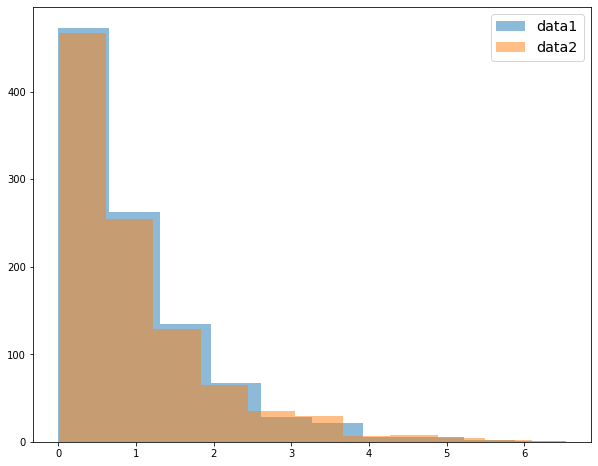

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(Exp, alpha=0.5, label="data1")
plt.hist(Exp1, alpha=0.5, label="data2")
plt.legend(fontsize = 'x-large')

## Numerical evaluation of $F^{-1}$

If $F^{-1}$ is not known explicitly, the inverse method is still applicable by numerical evaluation of $F^{-1}$.

Given $F$ is continuous and differentialable, computing $F^{-1}(u)$ is equivalent to find the root x such that $F(x)-u = 0$.

We can use the Newton's method to find $F^{-1}(u)$ using

$$x_{n+1} = x_n-\frac{F(x_n)-u}{f(x_n)}.$$

When converge, we have $x_n \rightarrow F^{-1}(u)$.

In [5]:
def exp_F(x, theta=1):
    return 1-np.exp(-x/theta)

def exp_f(x, theta=1):
    return (1/theta)*np.exp(-x/theta)

In [6]:
def inv_function(u, F, f, init, theta, eps = 10**(-7), maxit = 100):
    old_value = init
    for i in range(maxit):
        try:
            new_value = old_value - (F(old_value, theta)-u)/f(old_value, theta)
        except ZeroDivisionError:
            print("Zero division")
            return None
        if abs(new_value-old_value) < eps:
            return new_value
        old_value = new_value
    print("Fail to converge")

In [7]:
def random_exp2(theta = 1):
    U = np.random.uniform()
    return (inv_function(U, exp_F, exp_f, 0, theta))

In [8]:
Exp2 = np.array([random_exp2() for i in range(1000)])

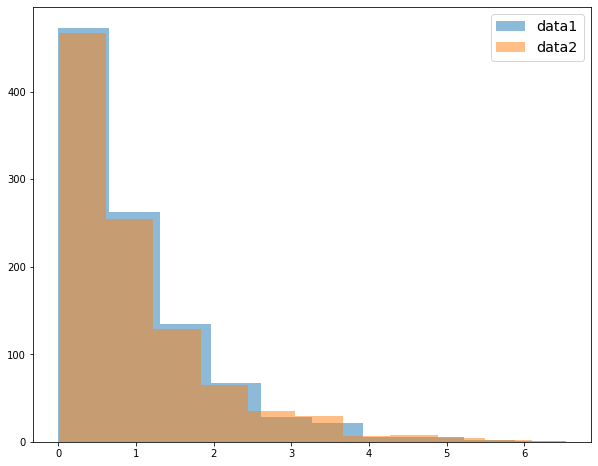

In [9]:
plt.figure(figsize=(10,8))
plt.hist(Exp, alpha=0.5, label="data1")
plt.hist(Exp1, alpha=0.5, label="data2")
plt.legend(fontsize = 'x-large')

## Example: Gamma Random Variable

The exponential distribution is a special case of gamma distribution such that if $X\sim Exp(\theta)$, $X\sim Gamma(1, \theta)$. The Gamma distribution has the following property:

* If $X_1\sim Gamma (\alpha_1, \theta)$, $X_2\sim Gamma (\alpha_2, \theta)$, $\dots,$, $\sum_{i=1}^n X_i \sim Gamma(\sum_{i=1}^n \alpha_i, \theta)$.

* If $X\sim Gamma (\alpha, \theta)$, $c X \sim Gamma(\alpha, c\theta)$.

Using the above fact, we can generate random variable from gamma distribution.

In [10]:
def random_gamma(alpha=1, theta=1):
    exp = [random_exp(theta) for i in range(alpha)]
    return sum(exp)

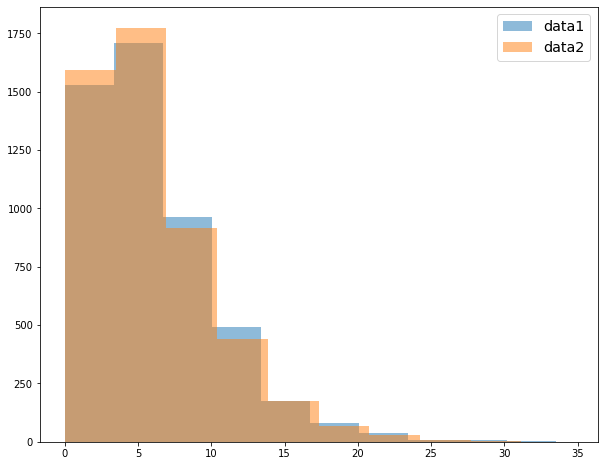

In [11]:
gamma1 = [random_gamma(2, 3) for i in range(5000)]
gamma2 = np.random.gamma(2, 3, size = 5000)
plt.figure(figsize=(10,8))
plt.hist(gamma1, alpha=0.5, label="data1", bins = 10)
plt.hist(gamma2, alpha=0.5, label="data2", bins = 10)
plt.legend(fontsize = 'x-large')

## Example: Laplace Random Variable

The Laplace distribution has the following density function (pdf):

$$f(x) = \frac{1}{2}e^{-|x|},\ \text{ for } x\in \mathbb{R} = \begin{cases}\frac{1}{2}e^{-x}, & x\ge 0\\ \frac{1}{2}e^{x}, & x <0\end{cases}. $$

It can be shown that if $X$ has Laplace distribution, $|X|\sim Exp(1)$. So, if we let $T = |X|$, given $T = t$, $X$ can only take two possible values $t$, or $-t$, each with probability 0.5. We can use this fact to generate random variable from Laplace distribution:

1. Generate $T\sim Exp(1)$ and $U\sim Uniform(0,1)$. 
2. 
    * return $T$ if $U>0.5$.
    * return $-T$ if $U \le 0.5$.
    
In this case, joint density function of $(U, X)$ is 

$$f(u, t) = \begin{cases}e^{-x}, & u> 0.5, x \ge0\\ e^{x}, & u \le 0.5, x < 0\end{cases}. $$

Integrate out u, we have $f(x)$ is the same as the pdf above.

In [12]:
def random_Laplace():
    T = random_exp()
    U = np.random.uniform()
    return (T**(U>0.5)*(-T)**(U<=0.5))

### Discrete Random Variable

Discrete random variable can be generated from a comparable way. Suppose we have a discrete random variable $X$ with support $\mathcal{S} = \{x_1, x_2, \dots, x_n\}$ with associated probabilities $p_1, p_2, \dots, p_n$, such that:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>$X$</th>
      <th>$P(X=x_i)$</th>
    </tr>
  </thead>
  <tbody>
    <tr style="text-align: right;">
      <td>$x_1$</td>
      <td>$p_1$</td>
    </tr>
    <tr style="text-align: right;">
      <td>$x_2$</td>
      <td>$p_2$</td>
    </tr>
    <tr style="text-align: right;">
      <td>$\vdots$</td>
      <td>$\vdots$</td>
    </tr>
    <tr style="text-align: right;">
      <td>$x_n$</td>
      <td>$p_n$</td>
    </tr>
  </tbody>
</table>

Recall 

$$F(x_j) = \sum_{i\le j}P(x_i)$$

we can split the interval $[0, 1]$ into $[0, F(x_1))$, $[F(x_1), F(x_2))$, $\dots$, $[F(x_n), 1]$.

Then, for $U\sim Uniform(0,1)$
$$P(F(x_{j-1})\le U < F(x_{j})) = F(x_{j})-F(x_{j-1}) = P(X = x_j),$$

where $F(x_0) = 0$.

Then, the procedure to generate a discrete random variable can be done as follows:

1. Sample $U\sim Uniform(0,1)$.
2. return $x_j$ if $F(x_{j-1})\le U < F(x_{j})$.

In [13]:
def discrete_random(X, P):
    index = 0
    U = np.random.uniform()
    p_i = P[index]
    while U > p_i:
        U = U-p_i
        index += 1
        p_i = P[index]
    return X[index]

### Example: generating a birthday

Assume we have 365 days in a year and the chance of born in each day is the same. How do we generate a birthday of a person?

In [14]:
def birthday_random():
    pass

## Rejection method

Suppose the goal is to generate a random variable that has pdf $f$ defined on $\mathcal{X}$. The basic version of rejection algorithm assumes 
* there exist a density function $g$ defined on $\mathcal{X}$ which we know how to generate samples (easily). 
* Also, $g$ has the property that for some constant $c>0$, 

$$f(x) \le cg(x), \ \text{ for all } x\in \mathcal{X}.$$

In this case, the $g$ density is called the "instrumental" density and $cg(x)$ is known as an envelope.

The procesure to generate a random variable from $f$ can be done by:

1. Sample $X\sim g$, and $U\sim Uniform(0,1)$.
2. 
    * accept and return X if $U \le f(X)/(cg(X))$.
    * else, go to step 1.

### Example

Suppose we would like to generate a random variable that has the following density function

$$f(x) = 1-|x|, x\in [0,1] = \begin{cases}x+1, & -1\le x < 0\\ -x+1, & 0\le x \le 1 \\ 0, & elsewhere\end{cases}.$$

In this case, we can let g to be the Uniform(-1, 1) and $c = 2$, such that $f(x) \le cg(x) = 1$ for all x.

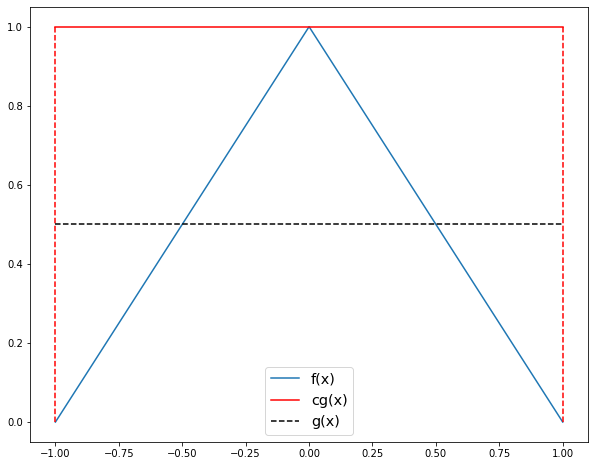

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot([-1, 0, 1], [0, 1, 0], label = "f(x)")
plt.plot([-1, 0, 1], [1, 1, 1], color = 'r', label = "cg(x)")
plt.plot([-1, -1], [1, 0], color = 'r', linestyle = '--')
plt.plot([1, 1], [0, 1], color = 'r', linestyle = '--')
plt.plot([-1, 1], [0.5, 0.5], color = 'k', linestyle = '--', label = 'g(x)')
plt.legend(fontsize = 'x-large')

In [16]:
def random_triangle():
    c = 2
    while True:
        U = np.random.uniform()
        X = np.random.uniform(-1, 1)
        if U*c*0.5 <= (1-abs(X)):
            return X

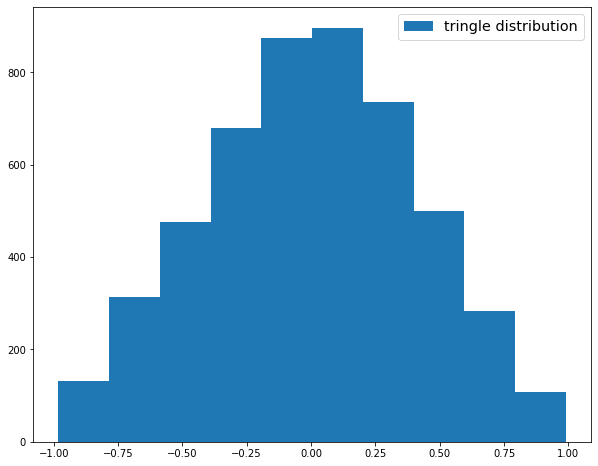

In [17]:
import numpy as np
import matplotlib.pyplot as plt
triangle = [random_triangle() for i in range(5000)]
plt.figure(figsize=(10,8))
plt.hist(triangle, label="tringle distribution", bins = 10)
plt.legend(fontsize = 'x-large')

### Remark

In the above algorithms, other values of $c$ also works as long as $c\ge 2$. However, since our accepting rule is accecpt when $U \le f(X)/(cg(X))$. So, as $c$ gets larger and larger, the chance of accepting is lower and we will need more iterations until accept. 

So, the rule is to set $c$ to be

$$c = sup_{x}\frac{f(x)}{g(x)}.$$

In [18]:
def random_triangle(c = 2):
    itr = 0
    while True:
        U = np.random.uniform()
        X = np.random.uniform(-1, 1)
        if U*c*0.5 <= (1-abs(X)):
            return X, itr
        itr += 1

In [19]:
triangle2 = [random_triangle()[1] for i in range(5000)] # c = 2
triangle10 = [random_triangle(c = 10)[1] for i in range(5000)] # c = 10

print("Average number of iterations until accept when c = 2 is {}".format(sum(triangle2)/len(triangle2)))
print("Average number of iterations until accept when c = 10 is {}".format(sum(triangle10)/len(triangle10)))

Average number of iterations until accept when c = 2 is 1.0156
Average number of iterations until accept when c = 10 is 8.8792


### Example: Generating Normal random variable

When using the rejection method, the domin of $f(x)$ and $g(x)$ should be the same.

Suppose we would like to generate random variable from a standard normal distribution. We know if $X\sim N(0,1)$, the density function $f(x)$ has the following form:

$$f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}},\ x\in \mathbb{R}.$$

The distribution is symmetric and $x\in \mathbb{R}$. Since we know the Laplace distribution is also symmetric with support $\mathbb{R}$, we can use it as the instrumental density to generate normal random variable.

Since 

$$\frac{1}{2}(|x|-1)^2 = \frac{x^2}{2}+\frac{1}{2}-|x|\ge 0,$$

$$\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\le \frac{1}{\sqrt{2\pi}}e^{\frac{1}{2}-|x|} = cg(x)$$,

where $g(x) = 1/2e^{-|x|}$ is the Laplace density and $c = \sqrt{2e/\pi}$.

So, to generate standard normal random variable, we can use the following procedure:

1. generating $T\sim Exp(1)$ and $U$ and $V$ are two independent random variable from $Uniform(0,1)$. Let $X$ is generating from Laplace distribution.

2. 
    * return $X$ if $\frac{1}{\sqrt{2\pi}}e^{\frac{1}{2}-|X|}V \le \frac{1}{\sqrt{2\pi}}e^{-\frac{X^2}{2}}$ (Can be simplified).
    * else, go back to step 1.

In [20]:
def random_normal(mu=0, sigma=1):
    while True:
        V = np.random.uniform()
        X = random_Laplace()
        if ((1/((2*np.pi)**0.5))*np.exp(0.5-abs(X)))*V <= ((1/((2*np.pi)**0.5))*np.exp(-X**2/2)):
            return sigma*X+mu
    
    

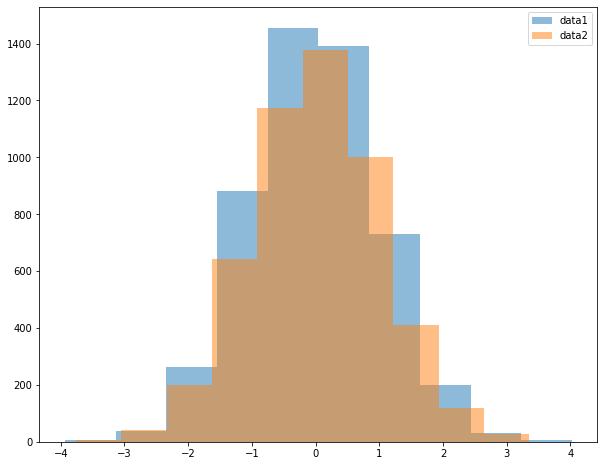

In [21]:
norm1 = [random_normal() for i in range(5000)]
norm2 = np.random.normal(size = 5000)
plt.figure(figsize=(10,8))
plt.hist(norm1, alpha=0.5, label="data1", bins = 10)
plt.hist(norm2, alpha=0.5, label="data2", bins = 10)
plt.legend()